<a href="https://colab.research.google.com/github/saniya1-709/OIBSIP/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [3]:
# Loading the dataset
data = pd.read_csv("/content/creditcard[1].csv")


In [4]:
# Data Exploration
def explore_data(data):
    print("Dataset Information:\n")
    print(data.info())

    print("\nSummary Statistics:\n")
    print(data.describe())

    print("\nClass Distribution:\n")
    print(data['Class'].value_counts(normalize=True))

In [5]:
# Visualizing Class Distribution
def visualize_class_distribution(data):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Class', data=data, palette='viridis')
    plt.title('Class Distribution')
    plt.xlabel('Class (0: Legitimate, 1: Fraud)')
    plt.ylabel('Count')
    plt.show()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67434 entries, 0 to 67433
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    67434 non-null  int64  
 1   V1      67434 non-null  float64
 2   V2      67434 non-null  float64
 3   V3      67434 non-null  float64
 4   V4      67434 non-null  float64
 5   V5      67434 non-null  float64
 6   V6      67434 non-null  float64
 7   V7      67434 non-null  float64
 8   V8      67434 non-null  float64
 9   V9      67434 non-null  float64
 10  V10     67434 non-null  float64
 11  V11     67434 non-null  float64
 12  V12     67434 non-null  float64
 13  V13     67434 non-null  float64
 14  V14     67434 non-null  float64
 15  V15     67434 non-null  float64
 16  V16     67434 non-null  float64
 17  V17     67434 non-null  float64
 18  V18     67434 non-null  float64
 19  V19     67434 non-null  float64
 20  V20     67434 non-null  float64
 21  V21     67433

<ipython-input-5-10438dbb2283>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='viridis')


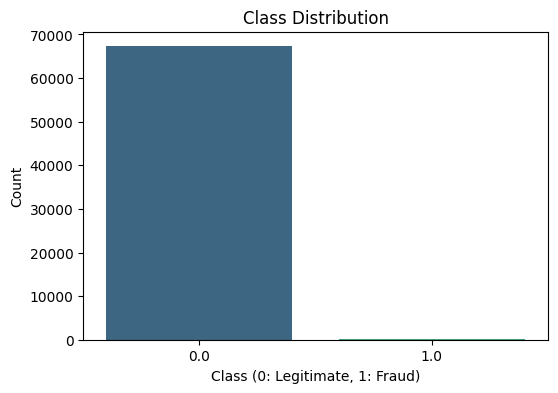

In [6]:
# Call exploration and visualization functions
explore_data(data)
visualize_class_distribution(data)

In [7]:
# Preprocessing: Feature Scaling and Train-Test Split
X = data.drop(columns=['Class'])
y = data['Class']

In [13]:
# Checking for missing values in the target variable
print("Missing values in 'Class':", data['Class'].isnull().sum())

# Dropping rows with missing target values
data = data.dropna(subset=['Class'])

Missing values in 'Class': 0


In [14]:
# Reassign X and y after handling missing values
X = data.drop(columns=['Class'])
y = data['Class']

In [8]:
# Scaling the 'Amount' and 'Time' features
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [15]:
# Proceed with scaling and train-test split
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
# Addressing Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [17]:
# Checking the distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class Distribution After SMOTE:
Class
0.0    47085
1.0    47085
Name: count, dtype: int64


In [18]:
# Training and Evaluating Models
def train_evaluate_model(X_train, y_train, X_test, y_test):
    # Logistic Regression
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    print("\nLogistic Regression Results:")
    print(classification_report(y_test, y_pred_lr))

In [19]:
    # Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print("\nRandom Forest Results:")
    print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20179
         1.0       0.91      0.80      0.85        51

    accuracy                           1.00     20230
   macro avg       0.96      0.90      0.93     20230
weighted avg       1.00      1.00      1.00     20230



In [20]:
    # Hyperparameter Tuning for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    }
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='roc_auc', cv=3)
    grid_search.fit(X_train, y_train)
    best_rf = grid_search.best_estimator_

    y_pred_best_rf = best_rf.predict(X_test)
    print("\nBest Random Forest Results:")
    print(classification_report(y_test, y_pred_best_rf))


Best Random Forest Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20179
         1.0       0.91      0.80      0.85        51

    accuracy                           1.00     20230
   macro avg       0.96      0.90      0.93     20230
weighted avg       1.00      1.00      1.00     20230



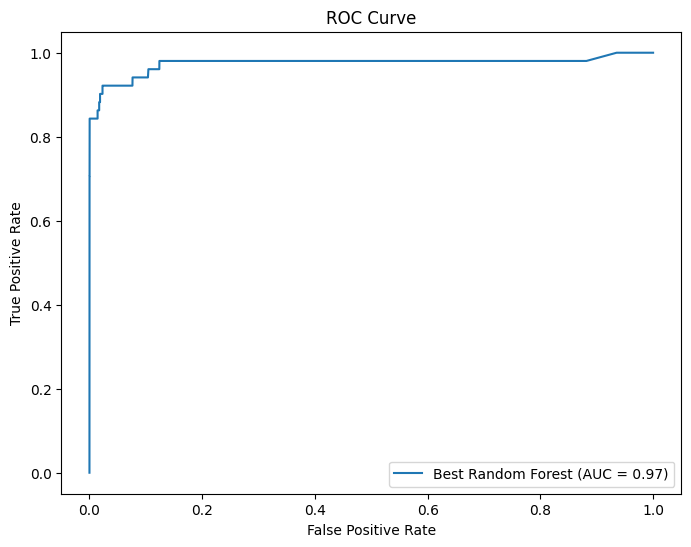

In [21]:
    # ROC-AUC Curve for the best Random Forest
    y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
    auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Best Random Forest (AUC = {auc_rf:.2f})')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

In [22]:
# Train and evaluate models
train_evaluate_model(X_train_smote, y_train_smote, X_test, y_test)


Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     20179
         1.0       0.15      0.84      0.25        51

    accuracy                           0.99     20230
   macro avg       0.57      0.92      0.62     20230
weighted avg       1.00      0.99      0.99     20230

